資料集描述：

1. Pregnancies: Number of times pregnant (懷孕了幾次)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (血液中葡萄糖濃度)
3. BloodPressure: Diastolic blood pressure (mm Hg) (舒張壓 mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm) (三頭肌皮摺厚度)
5. Insulin: 2-Hour serum insulin (mu U/ml) (胰島素濃度)
6. BMI: Body mass index (BMI 值)
7. DiabetesPedigreeFunction: Diabetes pedigree function (糖尿病函數，這個函數使用了家族糖尿病史來導出個人得糖尿病的風險值)
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0 無糖尿病，1 有糖尿病) -> 分類的目標

In [34]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

資料集視覺化

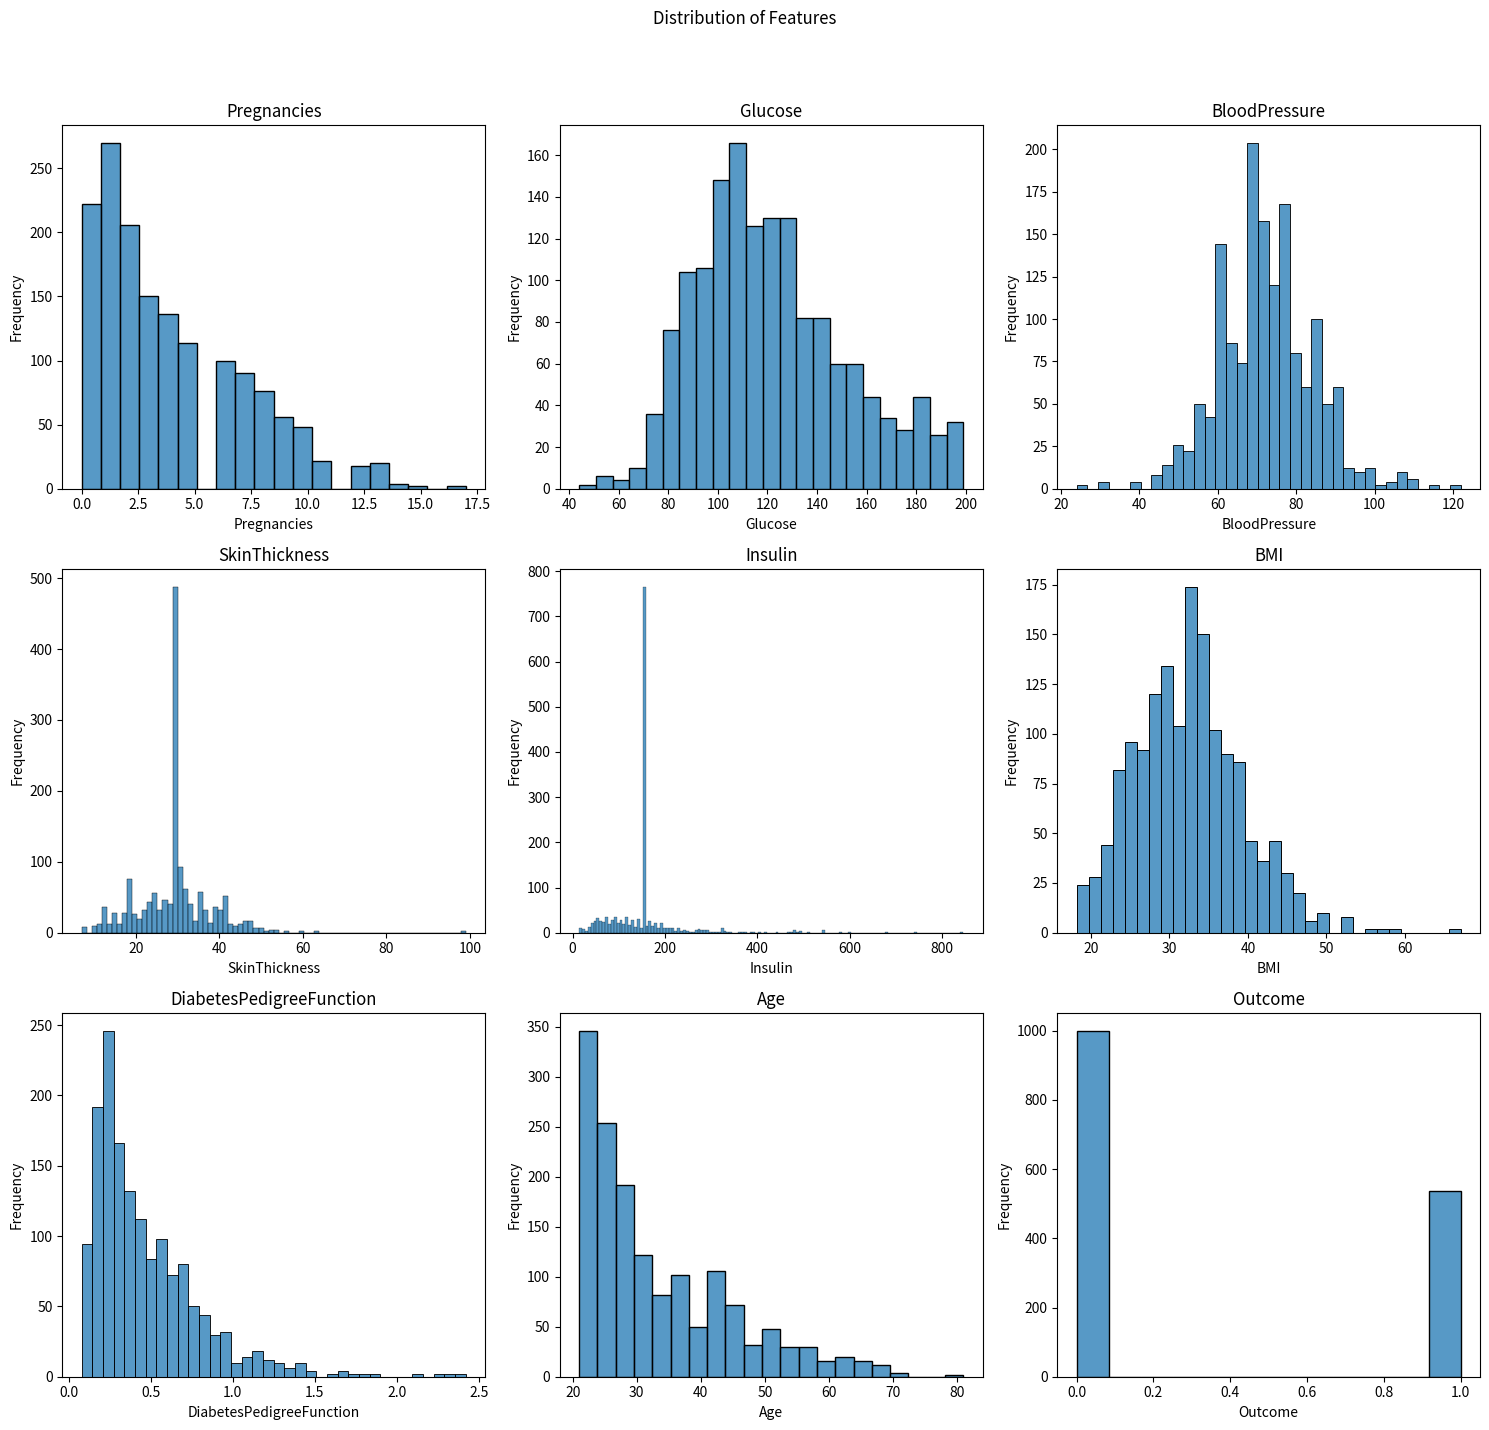

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
a_test_data = pd.read_csv('實驗A/test_data.csv')
a_train_data = pd.read_csv('實驗A/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')

# 合併數據
combined_data = pd.concat([a_train_data, a_test_data, b_train_data, b_test_data], ignore_index=True)

# 視覺化各欄位的分布
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 調整子圖的行列數及大小
fig.suptitle('Distribution of Features')

# 遍歷數據集中的每一個欄位並繪圖
for i, col in enumerate(combined_data.columns[:]): 
    ax = axes.flatten()[i]
    sns.histplot(combined_data[col], kde=False, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 調整整體布局
plt.show()


資料清理: 是否缺值/偵測異常(outlier)

In [36]:
import pandas as pd

# 讀取資料
a_test_data = pd.read_csv('實驗A/test_data.csv')
a_train_data = pd.read_csv('實驗A/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')

# 檢查缺失值
def check_missing_data(data):
    return data.isnull().sum()

# 偵測異常值
def detect_outliers(data):
    # 使用 IQR 方式偵測異常值
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any()
    return outliers

# 檢查各資料集
datasets = [a_test_data, a_train_data, b_test_data, b_train_data]
missing_info = {f'Dataset {i+1} - Missing Values': check_missing_data(data) for i, data in enumerate(datasets)}
outlier_info = {f'Dataset {i+1} - Outliers Detected': detect_outliers(data) for i, data in enumerate(datasets)}

print("Missing Values Information:")
for key, value in missing_info.items():
    print(key, value)

print("\nOutliers Information:")
for key, value in outlier_info.items():
    print(key, value)


Missing Values Information:
Dataset 1 - Missing Values Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Dataset 2 - Missing Values Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Dataset 3 - Missing Values Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Dataset 4 - Missing Values Pregnancies    

## 邏輯迴歸模型 Logistic regression
邏輯迴歸是一個用於分類的模型<br>
模型使用數學式尋找兩個資料之間的關係。再根據其中一個要素預測另一個要素的值。<br>
邏輯迴歸的預測通常具有有限數量的結果，例如是或否。<br>
<br>
邏輯迴歸模型的公式如下：
<br>
<img width = '150' src ="logit_func.png"/>

P(Y = 1) = exp(β0 + β1x1 + β2x2 + ... + βnxn) / (1 + exp(β0 + β1x1 + β2x2 + ... + βnxn))
其中：

- P(Y = 1) 表示事件發生的機率
- β0 表示截距
- β1、β2、...、βn 表示自變數的迴歸係數
- x1、x2、...、xn 表示自變數

邏輯迴歸模型具有以下優點：<br>
簡單易懂，易於解釋。
計算效率高。
適用於各種二分類問題。

邏輯迴歸模型的缺點如下：<br>
對異常值敏感。
容易出現過擬合。

參考資料:https://aws.amazon.com/tw/what-is/logistic-regression/

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score

# 匯入資料
a_test_data = pd.read_csv('實驗A/test_data.csv')
a_train_data = pd.read_csv('實驗A/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')


# 資料前處理 (標準化處理)
"""
將數據轉換為平均值為0，標準差為1的形式。這樣的轉換有助於許多機器學習算法的性能，尤其是那些依賴於數據距離的算法（如SVM or KNN）。
"""
scaler = StandardScaler()
a_train_data_scaled = scaler.fit_transform(a_train_data.drop('Outcome', axis=1))
a_test_data_scaled = scaler.transform(a_test_data.drop('Outcome', axis=1))
b_train_data_scaled = scaler.fit_transform(b_train_data.drop('Outcome', axis=1))
b_test_data_scaled = scaler.transform(b_test_data.drop('Outcome', axis=1))

# 將目標變數轉換為二維陣列
"""
機器學習模型，尤其是使用像 scikit-learn 這樣的庫時，預測目標（y）通常需要是特定形狀的數組。
對於許多模型（包括 logistic regression），期望的 y 應該是一個二維數組，即使它只有一列。
.reshape(-1, 1) 確保 y 總是一個二維數組，其中 -1 表示行數由數據本身決定，1 表示強制每行只有一個元素（單列）。
"""
a_y_train = a_train_data['Outcome'].values.reshape(-1, 1)
b_y_train = b_train_data['Outcome'].values.reshape(-1, 1)

# 建立模型
a_model = LogisticRegression()
a_model.fit(a_train_data_scaled, a_y_train)
b_model = LogisticRegression()
b_model.fit(b_train_data_scaled, b_y_train)

# 評估模型
a_y_pred = a_model.predict(a_test_data_scaled)
b_y_pred = b_model.predict(b_test_data_scaled)

# 計算評估參數
a_accuracy = accuracy_score(a_test_data['Outcome'], a_y_pred) # 計算 accuracy
a_recall = recall_score(a_test_data['Outcome'], a_y_pred) # 計算 recall
a_precision = precision_score(a_test_data['Outcome'], a_y_pred) # 計算 precision
a_f1 = f1_score(a_test_data['Outcome'], a_y_pred) # 計算 F1 score

b_accuracy = accuracy_score(b_test_data['Outcome'], b_y_pred) # 計算 accuracy
b_recall = recall_score(b_test_data['Outcome'], b_y_pred) # 計算 recall
b_precision = precision_score(b_test_data['Outcome'], b_y_pred) # 計算 precision
b_f1 = f1_score(b_test_data['Outcome'], b_y_pred) # 計算 F1 score

# 輸出結果
print('---實驗A---')
print('accuracy：', a_accuracy)
print('recall：', a_recall)
print('precision：', a_precision)
print('F1 分數：', a_f1,'\n')

print('---實驗B---')
print('accuracy：', b_accuracy)
print('recall：', b_recall)
print('precision：', b_precision)
print('F1 分數：', b_f1)


---實驗A---
accuracy： 0.7860696517412935
recall： 0.5774647887323944
precision： 0.7592592592592593
F1 分數： 0.656 

---實驗B---
accuracy： 0.8
recall： 0.5945945945945946
precision： 0.8148148148148148
F1 分數： 0.6875


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


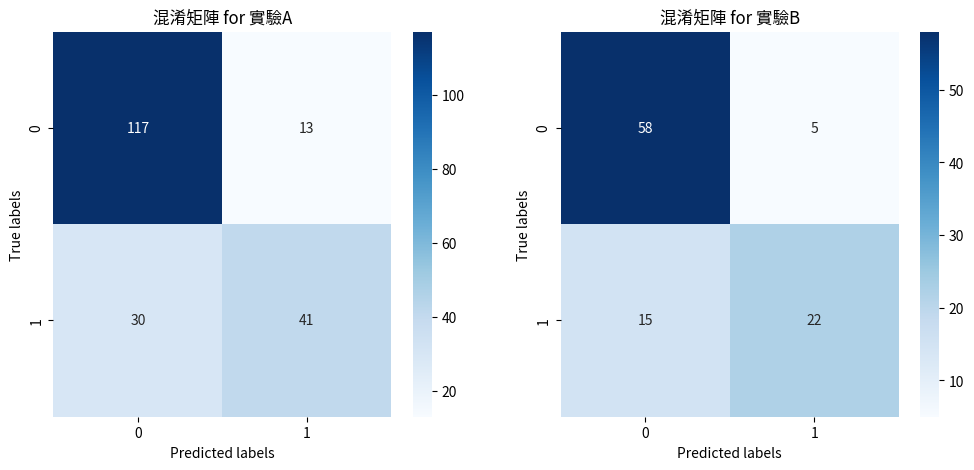

In [38]:
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 混淆矩陣計算
a_conf_matrix = confusion_matrix(a_test_data['Outcome'], a_y_pred)
b_conf_matrix = confusion_matrix(b_test_data['Outcome'], b_y_pred)

# 繪製混淆矩陣
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(a_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('混淆矩陣 for 實驗A')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

sns.heatmap(b_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title('混淆矩陣 for 實驗B')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.show()

> 發現準確率雖然高，但是recall很低 => 將糖尿病患者誤判為無病的機率高 (worst)
<br>
> 因此嘗試 代價敏感學習，將誤判正樣本為負樣本的代價設置得更高

## 代價敏感學習(將誤判正樣本為負樣本的代價設置得更高)
代價敏感學習是一種處理不平衡數據的技術，目的是為了使模型更加關注少數類或更重要的類別。<br>
通過賦予不同的類別不同的權重，可以使模型在訓練時更加專注於代價高的誤分類。這通常用於那些正類和負類的重要性不同的場景，例如醫療診斷、詐騙檢測等領域。

In [39]:
# 匯入必要函式庫
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 手動設定類別權重 (僅調整目標變量權重)
# Outcome 正樣本標籤為 1，負樣本標籤為 0
a_class_weight = {0: 1, 1: 2}  # 正樣本的代價更高
b_class_weight = {0: 1, 1: 2} 
"""
  提高了正樣本（有糖尿病）的權重，本質上是在告訴模型，將正樣本誤判為負樣本的代價更高。
"""

# 建立模型
a_model = LogisticRegression(class_weight=a_class_weight)
b_model = LogisticRegression(class_weight=b_class_weight)
# 訓練模型
a_model.fit(a_train_data_scaled, a_y_train)
b_model.fit(b_train_data_scaled, b_y_train)


# 評估模型
a_y_pred = a_model.predict(a_test_data_scaled)
b_y_pred = b_model.predict(b_test_data_scaled)

# 計算評估參數
a_accuracy_after = accuracy_score(a_test_data['Outcome'], a_y_pred) # 計算 accuracy
a_recall_after = recall_score(a_test_data['Outcome'], a_y_pred) # 計算 recall
a_precision_after = precision_score(a_test_data['Outcome'], a_y_pred) # 計算 precision
a_f1_after = f1_score(a_test_data['Outcome'], a_y_pred) # 計算 F1 score

b_accuracy_after = accuracy_score(b_test_data['Outcome'], b_y_pred) 
b_recall_after = recall_score(b_test_data['Outcome'], b_y_pred) 
b_precision_after = precision_score(b_test_data['Outcome'], b_y_pred)
b_f1_after = f1_score(b_test_data['Outcome'], b_y_pred) 

# 輸出結果
print('---實驗A---')
print('accuracy：', a_accuracy_after)
print('recall：', a_recall_after)
print('precision：', a_precision_after)
print('F1 分數：', a_f1_after,'\n')

print('---實驗B---')
print('accuracy：', b_accuracy_after)
print('recall：', b_recall_after)
print('precision：', b_precision_after)
print('F1 分數：', b_f1_after)



---實驗A---
accuracy： 0.7711442786069652
recall： 0.7746478873239436
precision： 0.6470588235294118
F1 分數： 0.7051282051282052 

---實驗B---
accuracy： 0.8
recall： 0.7567567567567568
precision： 0.717948717948718
F1 分數： 0.736842105263158


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


視覺化手動調權重前後結果

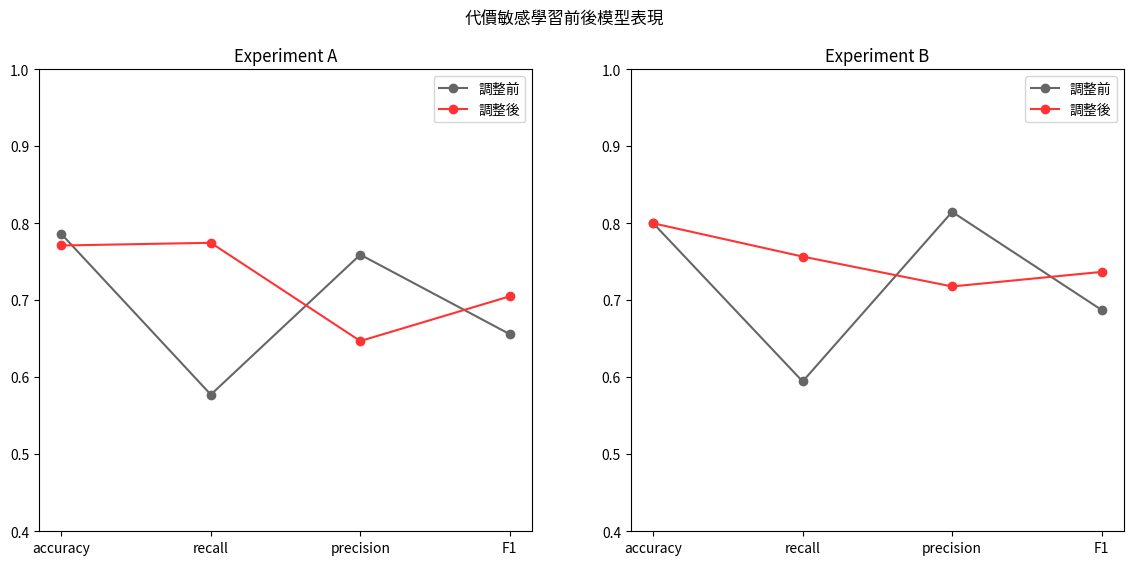

In [40]:
import matplotlib.pyplot as plt

# 折線圖

performance_before_a = {'accuracy': a_accuracy, 'recall': a_recall, 'precision': a_precision, 'F1': a_f1}
performance_after_a = {'accuracy': a_accuracy_after, 'recall': a_recall_after, 'precision': a_precision_after, 'F1': a_f1_after}
performance_before_b = {'accuracy': b_accuracy, 'recall': b_recall, 'precision': b_precision, 'F1': b_f1}
performance_after_b = {'accuracy': b_accuracy_after, 'recall': b_recall_after, 'precision': b_precision_after, 'F1': b_f1_after}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('代價敏感學習前後模型表現')

# 實驗A
axes[0].plot(list(performance_before_a.keys()), list(performance_before_a.values()), marker='o', color='#666666', label='調整前')
axes[0].plot(list(performance_after_a.keys()), list(performance_after_a.values()), marker='o', color='#FF3333', label='調整後')
axes[0].set_title('Experiment A')
axes[0].set_ylim([0.4, 1])  # 更新Y軸範圍
axes[0].legend()

# 實驗B
axes[1].plot(list(performance_before_b.keys()), list(performance_before_b.values()), marker='o', color='#666666', label='調整前')
axes[1].plot(list(performance_after_b.keys()), list(performance_after_b.values()), marker='o', color='#FF3333', label='調整後')
axes[1].set_title('Experiment B')
axes[1].set_ylim([0.4, 1])  # 更新Y軸範圍
axes[1].legend()

plt.show()



>　實驗A和實驗B的 Accuracy下降 

經過將目標變數正樣本權重加重後，模型更傾向於將邊界情況劃歸為正樣本。這種策略雖然可以提高正樣本的recall（減少將真正樣本誤判為負樣本的情況），但同時可能會導致更多的假陽性（將實際上是負樣本-無糖尿病的情況，誤判為正樣本-有糖尿病）。
<br>
準確率的下降:
當模型開始產生更多的假陽性時，雖然它可能正確地識別了更多的真正樣本，但同時也錯誤地將更多的負樣本標記為正樣本。如果整體增加的假陽性數目超過了由於更好的召回率帶來的真正增加數目，那麼模型正確預測的總比例（即準確率）可能會下降。



> 實驗A和實驗B的 的 F1 皆上升
precision和recall的調和平均，用於衡量模型的準確性和可靠性。如果召回率的提高不足以抵消精確率的下降，F1 分數可能會下降。<br>
由此可知，將正樣本的權重調為2時，幫助模型達到更好的性能平衡。

## GridSearchCV找最佳參數
使用 GridSearchCV 來找到 LogisticRegression 模型的最佳 C 和 penalty 參數<br>
LogisticRegression 模型有幾個參數，如 C 和 penalty，可以用來控制模型的複雜度和正則化程度。<br>
觀察模型在訓練集和測試集上的表現差異，可以間接判斷是否存在過度擬合的問題。

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 讀取數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')

# 資料前處理 (標準化處理)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(a_train_data.drop('Outcome', axis=1))
X_test_scaled = scaler.transform(a_test_data.drop('Outcome', axis=1))
y_train = a_train_data['Outcome'].values
y_test = a_test_data['Outcome'].values

# 建立 LogisticRegression 模型，指定使用 'saga' 求解器
logreg = LogisticRegression(solver='saga', max_iter=10000)

# 設置要試驗的參數網格
param_grid = {
    'C': np.logspace(-2, 2, num=20),  # 從 0.01 到 100 測試，對數尺度
    'penalty': ['l1', 'l2', 'elasticnet']
}
"""
'C': 這是正則化強度的倒數。較小的 C 值指定更強的正則化

'penalty': 
這個參數用來指定用於正則化的標準。不同的值代表不同類型的正則化：
'l1': L1 正則化，傾向於產生少數幾個特徵的權重較大，其餘為零。
'l2': L2 正則化，通常會使所有特徵的權重均勻減小，並且是 Ridge 迴歸中使用的正則化。
'elasticnet': 結合了 L1 和 L2 正則化的特性。
'None' : 不使用任何正則化
"""

# 創建 GridSearchCV 對象
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')  # 使用 5 折交叉驗證

# 執行網格搜索
grid_search.fit(X_train_scaled, y_train)

# 查看最佳參數和最佳分數
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best cross-validation score (accuracy): {:.2f}'.format(best_score))

# 使用最佳參數的模型對測試數據進行預測
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 計算評估參數
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Test accuracy:', accuracy)
print('Test recall:', recall)
print('Test precision:', precision)
print('Test F1 score:', f1)


Best parameters: {'C': 0.04281332398719394, 'penalty': 'l2'}
Best cross-validation score (accuracy): 0.77
Test accuracy: 0.7711442786069652
Test recall: 0.5352112676056338
Test precision: 0.7450980392156863
Test F1 score: 0.6229508196721312


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

> C=0.11288378916846889表示相對較強的正則化，這有助於防止模型過擬合。
>
> penalty：指定用於正則化的範數。在這裡使用了l1範數，即Lasso正則化，它傾向於產生一些係數為零的解，從而促進稀疏模型，有助於特徵選擇。

## PCA+K-means+Logistic Regression

先計算K-means的cluster數量，設定1-20做視覺化，而PCA設定為n_components=0.95

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER

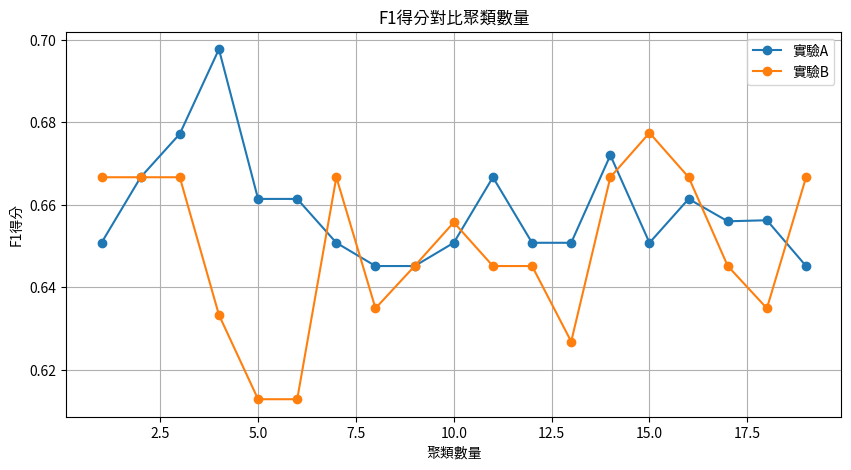

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# 載入數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

# 分離特徵和標籤
y_train_a = a_train_data.iloc[:, -1]
y_test_a = a_test_data.iloc[:, -1]
y_train_b = b_train_data.iloc[:, -1]
y_test_b = b_test_data.iloc[:, -1]

X_train_a = a_train_data.iloc[:, :-1]
X_test_a = a_test_data.iloc[:, :-1]
X_train_b = b_train_data.iloc[:, :-1]
X_test_b = b_test_data.iloc[:, :-1]

# 數據標準化
scaler_a = StandardScaler()
scaler_b = StandardScaler()
X_train_a_scaled = scaler_a.fit_transform(X_train_a)
X_test_a_scaled = scaler_a.transform(X_test_a)
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# 應用PCA
pca_a = PCA(n_components=0.95)
pca_b = PCA(n_components=0.95)
X_train_a_pca = pca_a.fit_transform(X_train_a_scaled)
X_test_a_pca = pca_a.transform(X_test_a_scaled)
X_train_b_pca = pca_b.fit_transform(X_train_b_scaled)
X_test_b_pca = pca_b.transform(X_test_b_scaled)

# 聚類和F1得分計算
f1_scores_a = []
f1_scores_b = []

for k in range(1, 20):  # 測試不同的聚類數從1到20
    # 實驗A的K-means聚類
    kmeans_a = KMeans(n_clusters=k, random_state=42)
    kmeans_a.fit(X_train_a_pca)
    X_train_a_clusters = np.column_stack((X_train_a_pca, kmeans_a.labels_))
    X_test_a_clusters = np.column_stack((X_test_a_pca, kmeans_a.predict(X_test_a_pca)))

    # 訓練邏輯迴歸模型並計算F1得分
    logistic_model_a = LogisticRegression()
    logistic_model_a.fit(X_train_a_clusters, y_train_a)
    predictions_a = logistic_model_a.predict(X_test_a_clusters)
    f1_a = f1_score(y_test_a, predictions_a)
    f1_scores_a.append(f1_a)
    
    # 實驗B的K-means聚類
    kmeans_b = KMeans(n_clusters=k, random_state=42)
    kmeans_b.fit(X_train_b_pca)
    X_train_b_clusters = np.column_stack((X_train_b_pca, kmeans_b.labels_))
    X_test_b_clusters = np.column_stack((X_test_b_pca, kmeans_b.predict(X_test_b_pca)))

    # 訓練邏輯迴歸模型並計算F1得分
    logistic_model_b = LogisticRegression()
    logistic_model_b.fit(X_train_b_clusters, y_train_b)
    predictions_b = logistic_model_b.predict(X_test_b_clusters)
    f1_b = f1_score(y_test_b, predictions_b)
    f1_scores_b.append(f1_b)

# 繪製F1得分變化圖
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), f1_scores_a, label='實驗A', marker='o')
plt.plot(range(1, 20), f1_scores_b, label='實驗B', marker='o')
plt.title('F1得分對比聚類數量')
plt.xlabel('聚類數量')
plt.ylabel('F1得分')
plt.legend()
plt.grid(True)
plt.show()



套入參數 進行分析

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 加載數據
a_train_data = pd.read_csv('實驗A/train_data.csv')
a_test_data = pd.read_csv('實驗A/test_data.csv')
b_train_data = pd.read_csv('實驗B/train_data.csv')
b_test_data = pd.read_csv('實驗B/test_data.csv')

# 假設最後一列是標籤
y_train_a = a_train_data.iloc[:, -1]
y_test_a = a_test_data.iloc[:, -1]
y_train_b = b_train_data.iloc[:, -1]
y_test_b = b_test_data.iloc[:, -1]

# 特徵數據
X_train_a = a_train_data.iloc[:, :-1]
X_test_a = a_test_data.iloc[:, :-1]
X_train_b = b_train_data.iloc[:, :-1]
X_test_b = b_test_data.iloc[:, :-1]

# 數據標準化
scaler_a = StandardScaler()
scaler_b = StandardScaler()

X_train_a_scaled = scaler_a.fit_transform(X_train_a)
X_test_a_scaled = scaler_a.transform(X_test_a)
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# 應用PCA
pca_a = PCA(n_components=0.95)
pca_b = PCA(n_components=0.95)

X_train_a_pca = pca_a.fit_transform(X_train_a_scaled)
X_test_a_pca = pca_a.transform(X_test_a_scaled)
X_train_b_pca = pca_b.fit_transform(X_train_b_scaled)
X_test_b_pca = pca_b.transform(X_test_b_scaled)

# K-means聚類
kmeans_a = KMeans(n_clusters=4, random_state=42)
kmeans_a.fit(X_train_a_pca)
kmeans_b = KMeans(n_clusters=15, random_state=42)
kmeans_b.fit(X_train_b_pca)

X_train_a_pca_clusters = np.column_stack((X_train_a_pca, kmeans_a.labels_))
X_test_a_pca_clusters = np.column_stack((X_test_a_pca, kmeans_a.predict(X_test_a_pca)))
X_train_b_pca_clusters = np.column_stack((X_train_b_pca, kmeans_b.labels_))
X_test_b_pca_clusters = np.column_stack((X_test_b_pca, kmeans_b.predict(X_test_b_pca)))

# 訓練邏輯回歸模型
logistic_model_a = LogisticRegression()
logistic_model_b = LogisticRegression()

logistic_model_a.fit(X_train_a_pca_clusters, y_train_a)
logistic_model_b.fit(X_train_b_pca_clusters, y_train_b)

# 預測
predictions_a = logistic_model_a.predict(X_test_a_pca_clusters)
predictions_b = logistic_model_b.predict(X_test_b_pca_clusters)

# 計算性能指標
results_a = {
    "Accuracy": accuracy_score(y_test_a, predictions_a),
    "Recall": recall_score(y_test_a, predictions_a),
    "Precision": precision_score(y_test_a, predictions_a),
    "F1 Score": f1_score(y_test_a, predictions_a)
}

results_b = {
    "Accuracy": accuracy_score(y_test_b, predictions_b),
    "Recall": recall_score(y_test_b, predictions_b),
    "Precision": precision_score(y_test_b, predictions_b),
    "F1 Score": f1_score(y_test_b, predictions_b)
}

results_a, results_b



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


({'Accuracy': 0.8059701492537313,
  'Recall': 0.6338028169014085,
  'Precision': 0.7758620689655172,
  'F1 Score': 0.6976744186046512},
 {'Accuracy': 0.8,
  'Recall': 0.5675675675675675,
  'Precision': 0.84,
  'F1 Score': 0.6774193548387097})